In [6]:
import glob, os
from os import listdir
from os.path import isfile, join
from PIL import Image
from shutil import copy2

image_path= "./images/"

In [1]:
from darkflow.net.build import TFNet
import cv2

In [15]:
options = {"model": "./cfg/road_yolo.cfg", 
           "load": "./bin/yolov2.weights",
#            "load": -1,
           "batch" : 4,
           "epoch" : 30,
           "save" : 1000,
           "train": True,
           "dataset": "./images/",
           "annotation": "./annotations/",
           "gpu": 0.0}

# options
tfnet = TFNet(options)

Parsing ./cfg/yolov2.cfg
Parsing ./cfg/road_yolo.cfg
Loading ./bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.022383451461791992s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky     

In [16]:
tfnet.train()


./cfg/road_yolo.cfg parsing ./annotations/
Parsing for ['light', 'road line', 'window'] 
[====================>]100%  university_ave_7.xmlllll
Statistics:
road line: 173
light: 112
window: 311
Dataset size: 212
Dataset of 212 instance(s)
Training statistics: 
	Learning rate : 1e-05
	Batch size    : 4
	Epoch number  : 30
	Backup every  : 1000


KeyboardInterrupt: 

# Test Image

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def boxing(original_img, predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))

#         if confidence > 0.3:
        if confidence > 0.2:
#         if confidence > 0.1:
#         if confidence > 0.4:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
            
    return newImage

In [12]:
new_img = cv2.imread("./sample_img/streetview.jpg")
# new_img = cv2.imread("./images/streetlight54.jpg")
# new_img = cv2.imread("./sample_img/sample_multiple_objects.jpg")
# new_img = cv2.imread("./sample_img/streetlight3.jpg")
# new_img = cv2.imread("./sample_img/kite.jpg")

# new_img = cv2.imread("./sample_img/streetlight_TEST.jpg")

new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(new_img)

error: OpenCV(3.4.2) c:\miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<3,4,-1>,struct cv::Set<0,2,5>,2>::CvtHelper'


In [ ]:
new_results = tfnet.return_predict(new_img)
# plt.imshow(boxing(new_img, new_results))

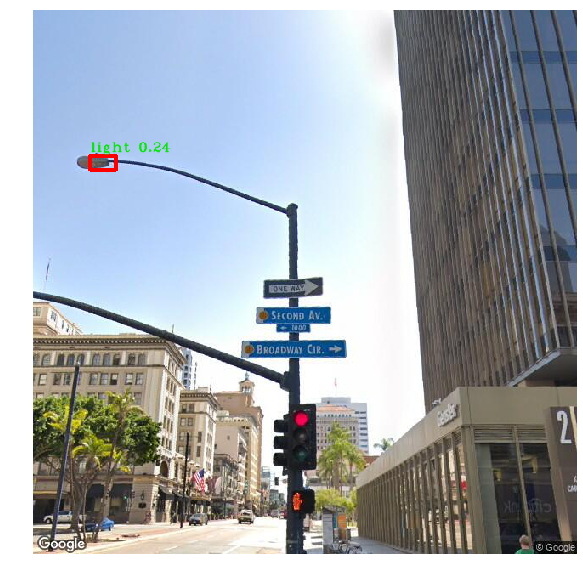

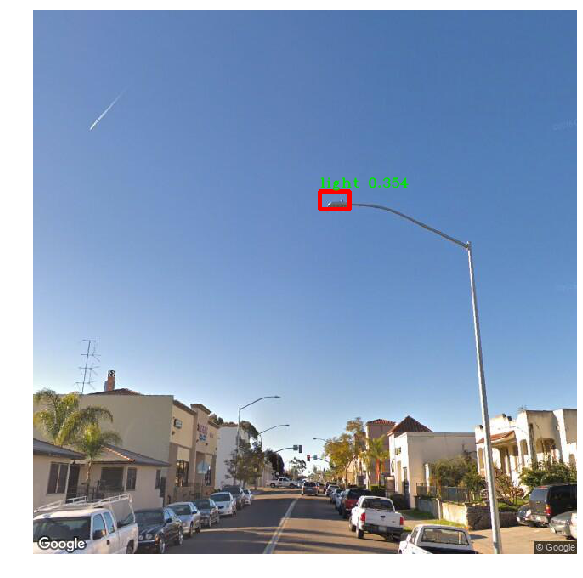

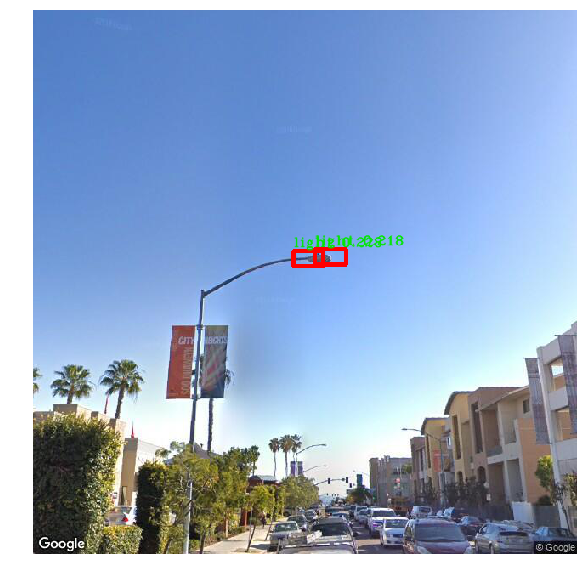

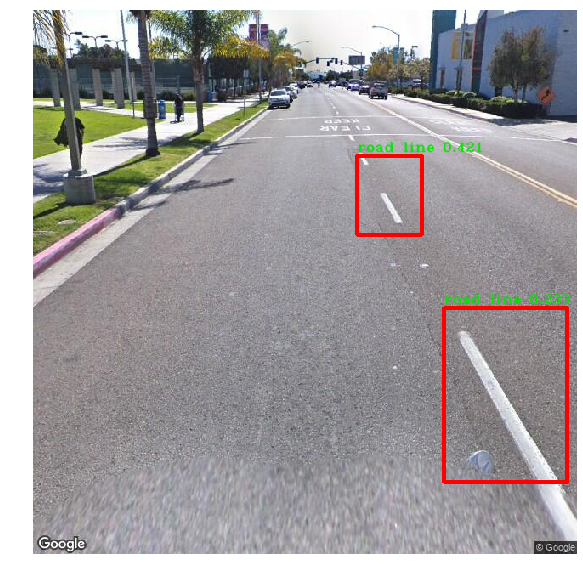

In [13]:
# new_results
# plt.figure(figsize=[10,10])
# plt.figure(figsize=[15,15])
# plt.axis('off')
# plt.imshow(boxing(new_img, new_results))


onlyfiles = [f for f in listdir("./sample_img/") if isfile(join("./sample_img/", f))]

for afile in onlyfiles:
    new_img = cv2.imread("./sample_img/"+afile)
    new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
    
    new_results = tfnet.return_predict(new_img)
    plt.figure(figsize=[10,10])
    plt.axis('off')
    plt.imshow(boxing(new_img, new_results))
#     ax.imshow(new_img)



In [7]:
def boxing_label(original_img, predictions,label,conf):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        predict_label = result['label']
        label_conf = result['label'] + " " + str(round(confidence, 3))
#         print(predict_label)
        if predict_label == label:
#             if confidence > 0.2:
            #             if confidence > 0.3:
            #         if confidence > 0.4:
            if confidence > conf:
                newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
                newImage = cv2.putText(newImage, label_conf, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
            
    return newImage

In [ ]:
new_results

plt.figure(figsize=[10,10])
# plt.imshow(boxing_label(new_img, new_results,'traffic light',0.2))
# plt.imshow(boxing_label(new_img, new_results,'car',0.2))

plt.imshow(boxing(new_img, new_results))

# plt.figure(figsize=[10,10])
# plt.imshow(boxing(new_img, new_results))